In [9]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
import gzip

In [10]:
from rdkit import RDLogger
RDLogger.DisableLog("rdApp.error")

In [26]:
# load your own set, and DrugBank :)
with open("../data/drd3_chembl_cmpds.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    drd3 = [Chem.MolFromSmiles(m['Smiles']) for m in reader]


suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

# open actives_final.sdf.gz and load the molecules
with gzip.open("../data/actives_final.sdf.gz", "r") as f:
    suppl = Chem.ForwardSDMolSupplier(f)
    actives = [m for m in suppl if m]

with gzip.open("../data/decoys_final.sdf.gz", "r") as f:
    suppl = Chem.ForwardSDMolSupplier(f)
    decoys = [m for m in suppl if m]

In [42]:
# from drugbank and actives find the one which have carboxylic acid in them


carboxy = Chem.MolFromSmarts('C(=O)[O;h1]')
carboxy.HasSubstructMatch(drugs[0])

# count the number of occurences of carboxylic acids drugbank
cooh_counts = [len(m.GetSubstructMatches(carboxy)) for m in drugs]
cooh_nonzero = [c for c in cooh_counts if c > 0]
len(cooh_counts), len(cooh_nonzero)
    


(7117, 1635)

In [45]:
# count the number of occurences of carboxylic acids in actives
cooh_counts = [len(m.GetSubstructMatches(carboxy)) for m in actives]
cooh_nonzero = [c for c in cooh_counts if c > 0]
len(cooh_counts), len(cooh_nonzero)

(877, 0)

In [44]:
# count the number of occurences of carboxylic acids in decoys
cooh_counts = [len(m.GetSubstructMatches(carboxy)) for m in decoys]
cooh_nonzero = [c for c in cooh_counts if c > 0]
len(cooh_counts), len(cooh_nonzero)

(34188, 1)

In [48]:
# now do it for all datasets with salicylic acid
salicylic = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')

# count the number of occurences of salicylic acid in drugbank, actives and decoys
cooh_counts = [len(m.GetSubstructMatches(salicylic)) for m in drugs]
cooh_nonzero = [c for c in cooh_counts if c > 0]
print(f'Number of molecules in drugbank: {len(cooh_counts)}')
print(f'Number of molecules in drugbank with salicylic acid: {len(cooh_nonzero)}')
print('\n')


cooh_counts = [len(m.GetSubstructMatches(salicylic)) for m in actives]
cooh_nonzero = [c for c in cooh_counts if c > 0]
print(f'Number of molecules in actives: {len(cooh_counts)}')
print(f'Number of molecules in actives with salicylic acid: {len(cooh_nonzero)}')
print('\n')

cooh_counts = [len(m.GetSubstructMatches(salicylic)) for m in decoys]
cooh_nonzero = [c for c in cooh_counts if c > 0]
print(f'Number of molecules in decoys: {len(cooh_counts)}')
print(f'Number of molecules in decoys with salicylic acid: {len(cooh_nonzero)}')
print('\n')

Number of molecules in drugbank: 7117
Number of molecules in drugbank with salicylic acid: 50


Number of molecules in actives: 877
Number of molecules in actives with salicylic acid: 0


Number of molecules in decoys: 34188
Number of molecules in decoys with salicylic acid: 17




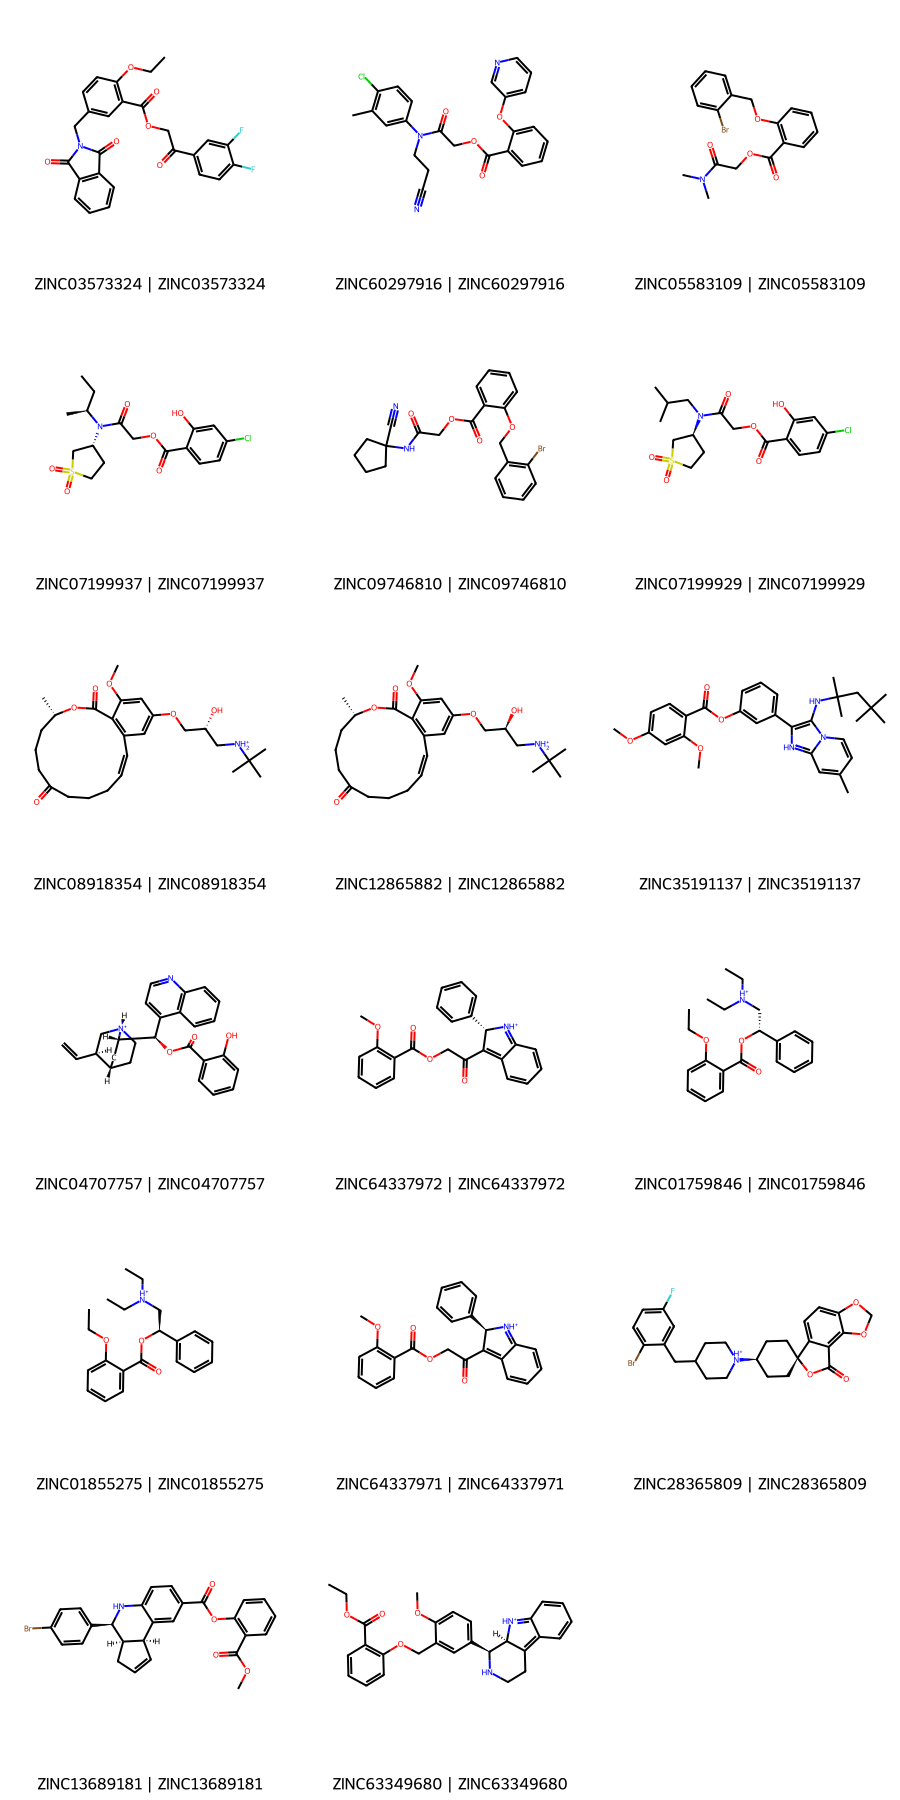

In [52]:
# compute 2d coordinates for the molecules
for m in decoys_salicylic:
    Chem.Compute2DCoords(m)

# use the 2d coordinates to draw the molecules
Draw.MolsToGridImage(decoys_salicylic, molsPerRow=3, subImgSize=(300,300),
                        legends=["{} | {}".format(m.GetProp("_Name"), m.GetProp("_Name"))
                                    for m in decoys_salicylic])


In [54]:
# PAINS
from itertools import chain

# load PAINS structures in SMARTS format from two files in data
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains, len(pains)


([[<rdkit.Chem.rdchem.Mol at 0x7f1195f52260>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f522d0>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52340>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f520a0>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52420>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52490>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52500>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f525e0>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52570>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52650>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f526c0>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52730>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f527a0>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52810>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x7f1195f52880>, '

In [55]:
# scan drugbang, actives and decoys for PAINS
for m in drugs:
    m.pain_matches = [p for p, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]

for m in actives:
    m.pain_matches = [p for p, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]

for m in decoys:
    m.pain_matches = [p for p, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]

print(f'Number of molecules with PAINS in drugbank: {len([m for m in drugs if len(m.pain_matches) > 0])}')
print(f'Number of molecules with PAINS in actives: {len([m for m in actives if len(m.pain_matches) > 0])}')
print(f'Number of molecules with PAINS in decoys: {len([m for m in decoys if len(m.pain_matches) > 0])}')


Number of molecules with PAINS in drugbank: 125
Number of molecules with PAINS in actives: 11
Number of molecules with PAINS in decoys: 783


In [57]:
actives_with_pains = [m for m in actives if len(m.pain_matches) > 0]
actives_with_pains

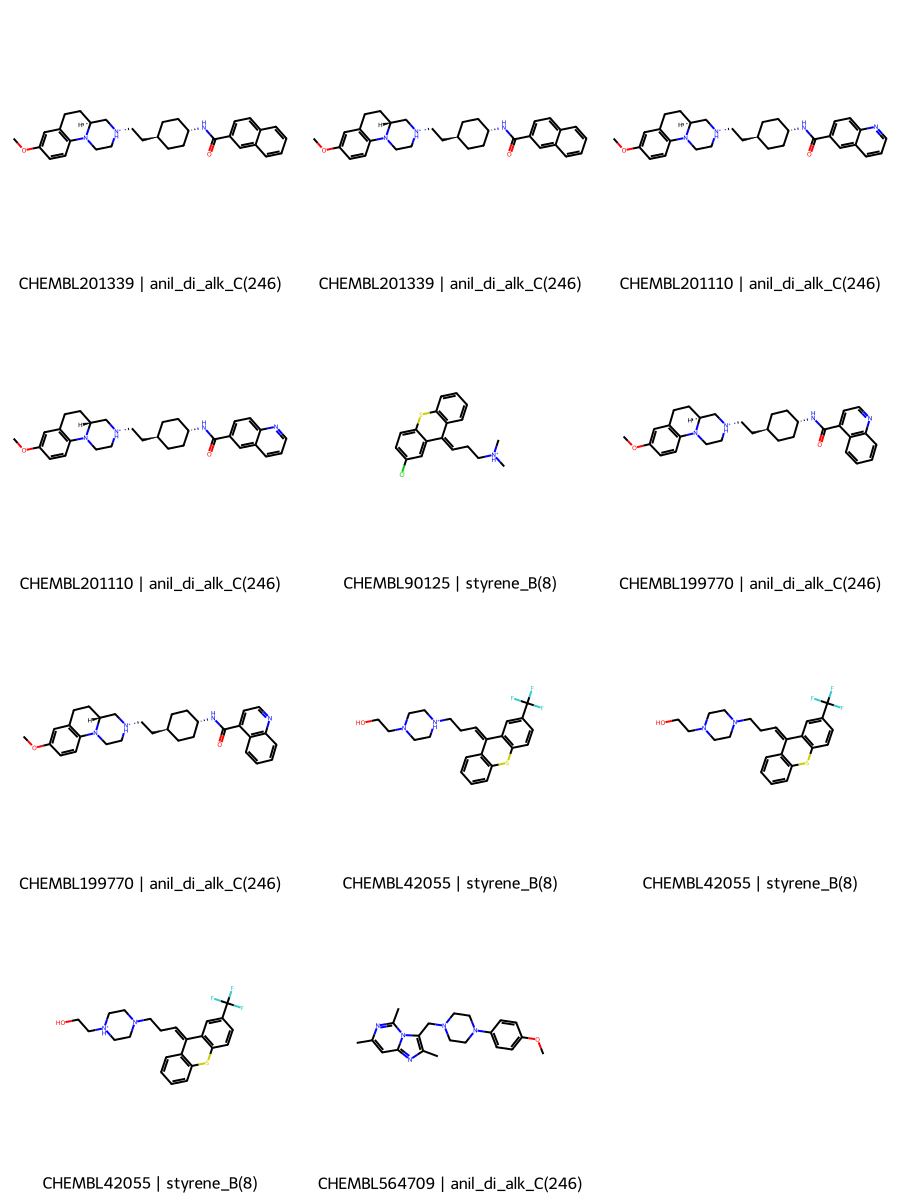

In [61]:
# compute 2d coordinates for the molecules
for m in actives_with_pains:    
    Chem.Compute2DCoords(m)
    

# add PAINs names to the image
Draw.MolsToGridImage(actives_with_pains, molsPerRow=3, subImgSize=(300,300),
                        legends=["{} | {}".format(m.GetProp("_Name"), ", ".join([pains[p][1] for p in m.pain_matches]))
                                    for m in actives_with_pains])

